In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Do you want to concatenate data?
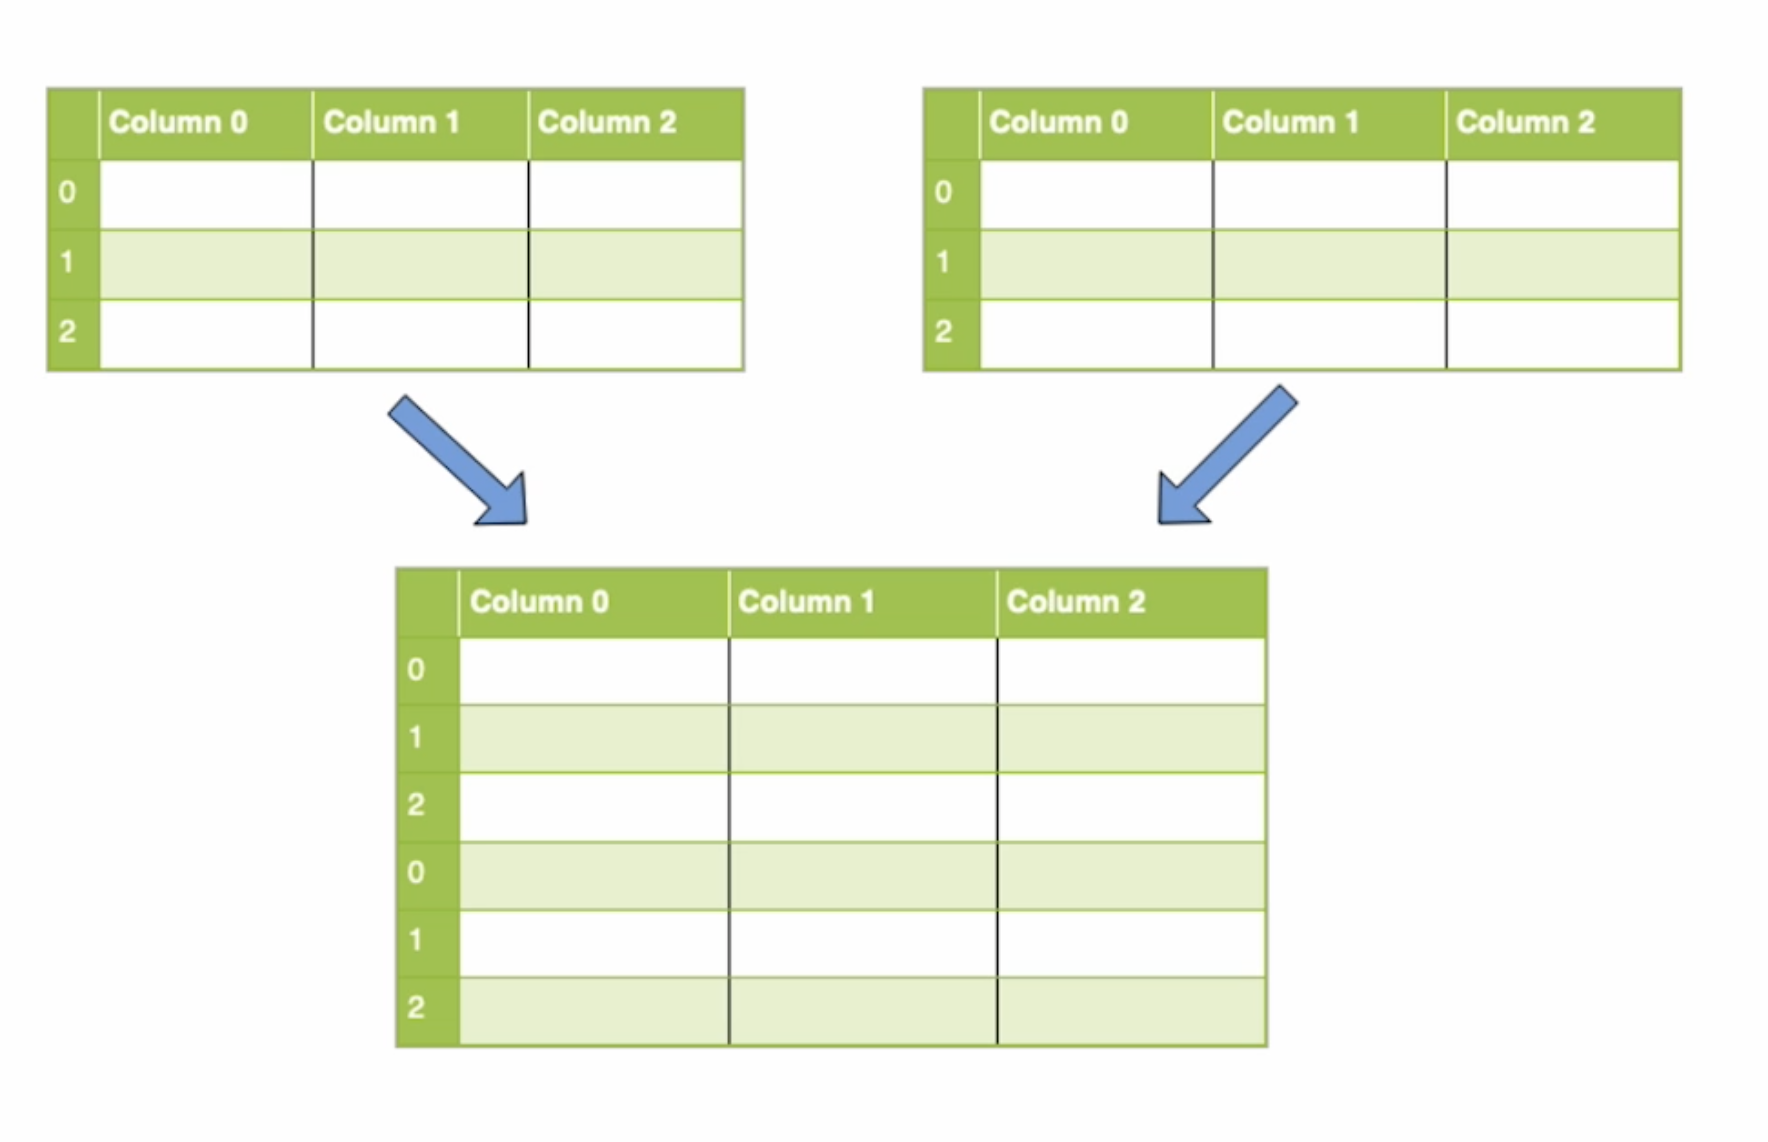
## Or do you want to use database join operations?
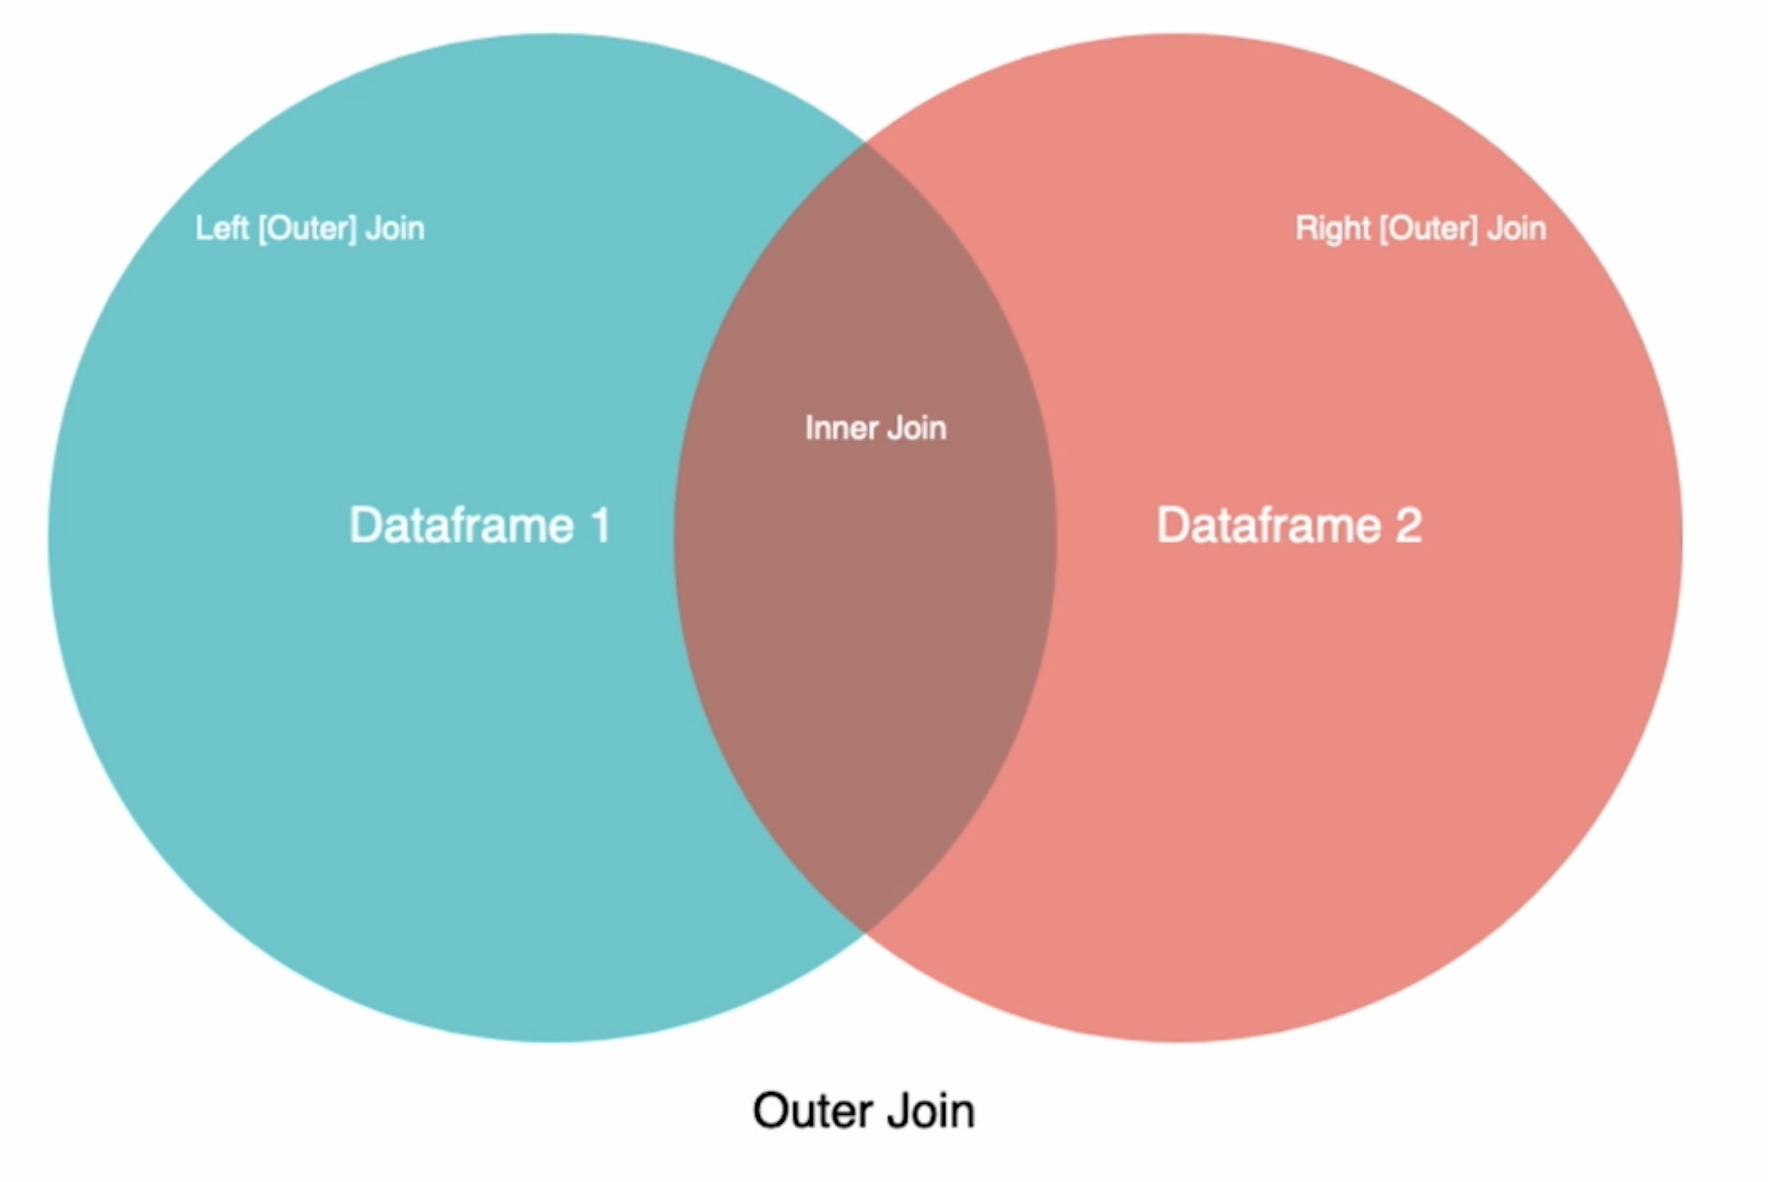
# Ir ka visa tai reiskia?
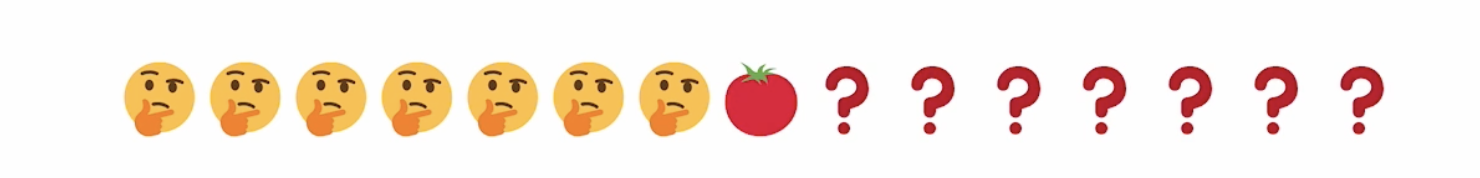

In [4]:
couple_of_fruits = {'name': ['apple', 'pear', 'tomato', 'lemon'],
                    'image': ['🍏', '🍐', '🍅', '🍋']}

vegetables = {'name': ['tomato', 'potato', 'carrot'],
              'color':['red', 'brown', 'orange'],
              'image': ['🍅', '🥔', '🥕']}

fruits = pd.DataFrame(couple_of_fruits)
veggies = pd.DataFrame(vegetables)              

In [5]:
fruits

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋

In [6]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

# <b>Combining Data using concat()</b>

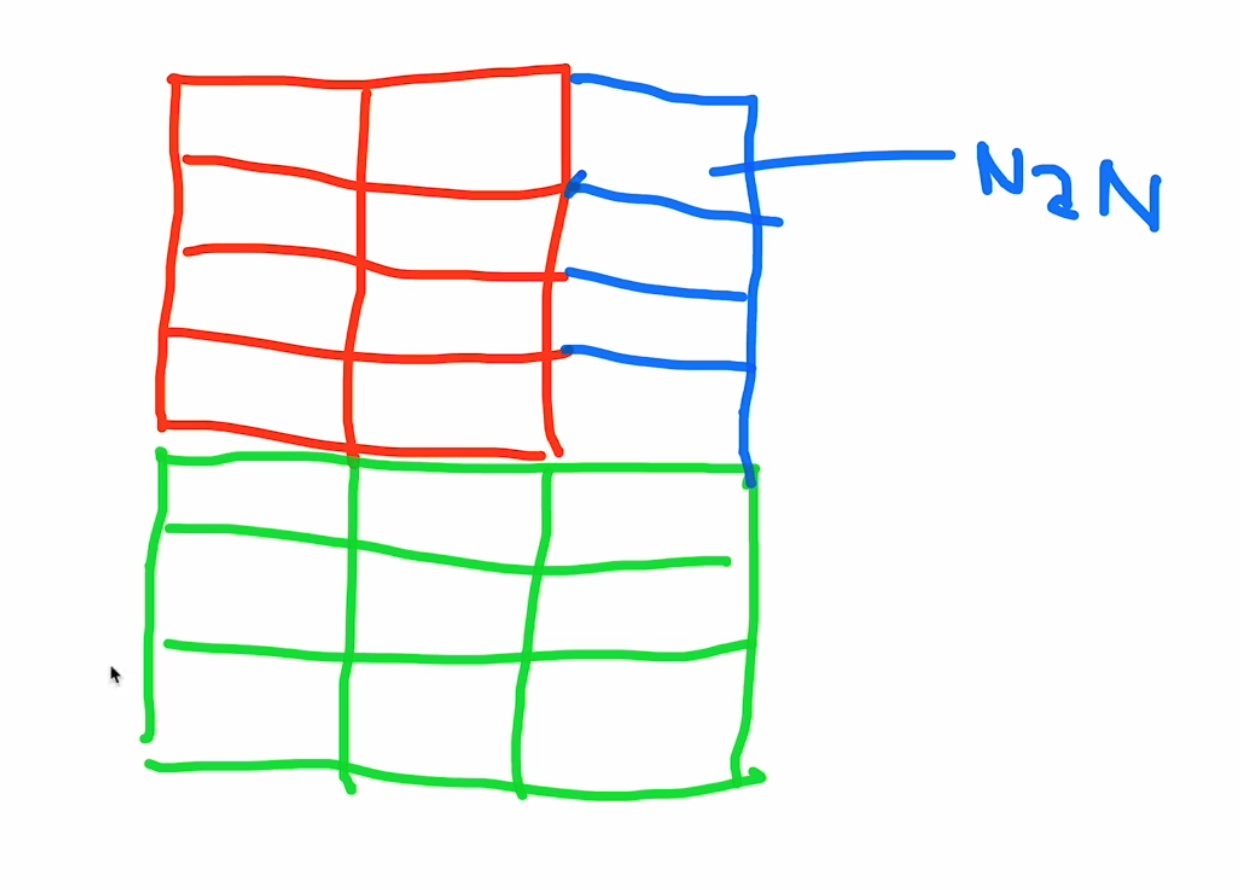

# <b>Concatenate Along the Row Axis</b>

In [7]:
pd.concat([fruits, veggies])

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

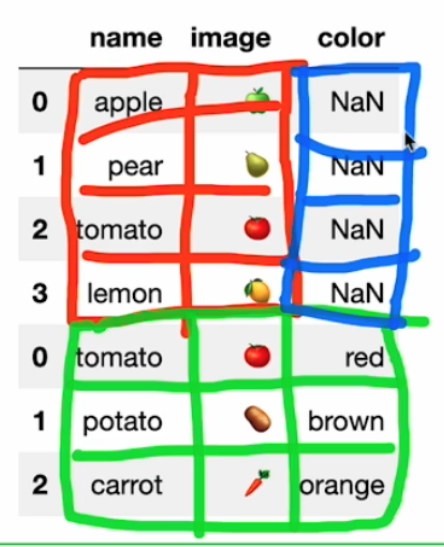

In [8]:
# the order matters, what it will be if pass it differently?
pd.concat([veggies, fruits])

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕
0   apple     NaN     🍏
1    pear     NaN     🍐
2  tomato     NaN     🍅
3   lemon     NaN     🍋

# <b>Concatenate Along the Column Axis</b>


In [9]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis=0,
    join='outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'FrameOrSeriesUnion'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis 

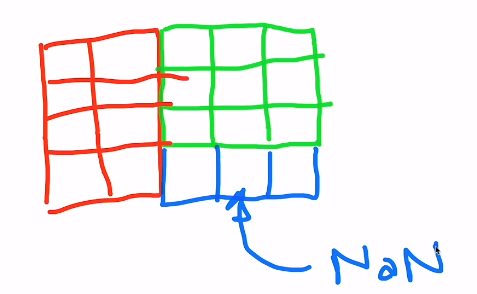

In [10]:
pd.concat([fruits, veggies], axis='columns')

name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕
3   lemon     🍋     NaN     NaN   NaN

In [11]:
pd.concat([veggies, fruits], axis='columns')

name   color image    name image
0  tomato     red     🍅   apple     🍏
1  potato   brown     🥔    pear     🍐
2  carrot  orange     🥕  tomato     🍅
3     NaN     NaN   NaN   lemon     🍋

# <b>Mark Your DataFrames With Keys</b>

In [12]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis=0,
    join='outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'FrameOrSeriesUnion'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, default 0
    The axis 

In [13]:
df = pd.concat([fruits, veggies], axis='rows', keys=['fruits', 'veggies'])

In [14]:
pd.concat([fruits, veggies], axis='columns', keys=['fruits', 'veggies'])

fruits       veggies              
     name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕
3   lemon     🍋     NaN     NaN   NaN

In [15]:
df.name
df.loc['fruits'].name
df.loc['fruits']['image']

0    🍏
1    🍐
2    🍅
3    🍋
Name: image, dtype: object

In [16]:
df.iloc[0]
df.loc['veggies'].iloc[1]

name     potato
image         🥔
color     brown
Name: 1, dtype: object

# <b>Access Data in a Multi-Index DataFrame</b>


In [17]:
single = pd.concat([veggies, fruits])

In [18]:
single

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕
0   apple     NaN     🍏
1    pear     NaN     🍐
2  tomato     NaN     🍅
3   lemon     NaN     🍋

In [19]:
#error
single.loc[0:2,:]

KeyError: 'Cannot get left slice bound for non-unique label: 0'

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'])

In [ ]:
multivitamin

In [ ]:
multivitamin.loc[('fruits', 1):('veggies', 2), :]

In [ ]:
multivitamin.loc['fruits', 0]

In [ ]:
multivitamin.loc['veggies', 0]

# <b>Recreate a New Index After Concatenation</b>

In [ ]:
pd.concat?

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'], ignore_index=False)
# multivitamin = pd.concat([fruits, veggies], ignore_index=False)
multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], keys=['fruits', 'veggies'], ignore_index=True)
multivitamin = pd.concat([fruits, veggies], ignore_index=True)

multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], axis='columns')
multivitamin

In [ ]:
multivitamin = pd.concat([fruits, veggies], axis='columns', ignore_index=True)
multivitamin

# <b>Join Columns When Concatenating on Rows</b>

In [20]:
pd.concat([fruits, veggies], axis=0, join='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

In [21]:
inner = pd.concat([fruits, veggies], axis=0, join='inner')

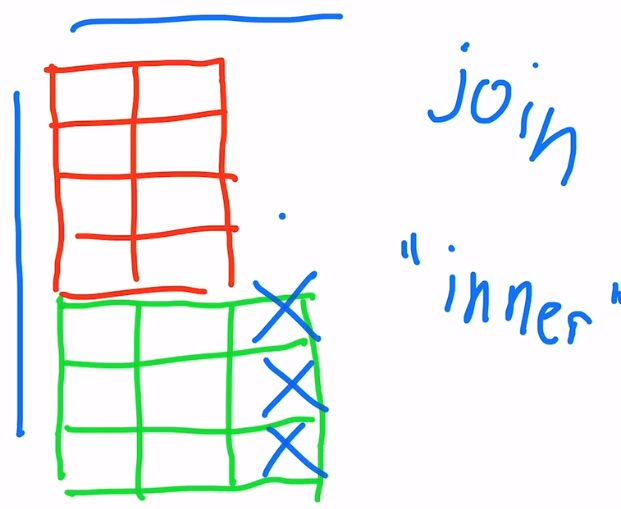

In [22]:
inner

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋
0  tomato     🍅
1  potato     🥔
2  carrot     🥕

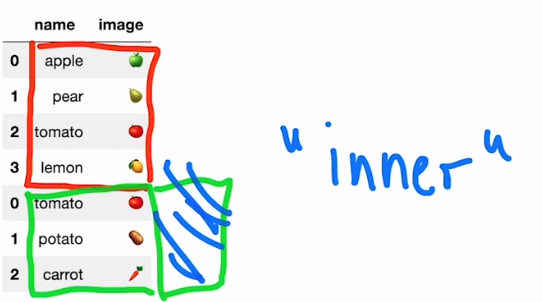

# <b>Join Rows When Concatenating on Columns</b>


In [23]:
inner = pd.concat([fruits, veggies], axis=1, join='inner')

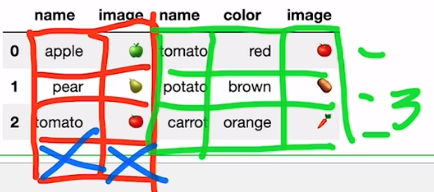

In [24]:
inner

name image    name   color image
0   apple     🍏  tomato     red     🍅
1    pear     🍐  potato   brown     🥔
2  tomato     🍅  carrot  orange     🥕

# <i>Daugiau informacijos apie pd.concat ir savo laiku galite paziureti taip:

In [25]:
help(pd.concat) # or looking at pandas documentation

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis=0, join='outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'FrameOrSeriesUnion'
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised.
    a

# <b>Perform an Inner Join Using merge() </b>

In [26]:
merging = pd.merge(fruits, veggies)
merging

name image color
0  tomato     🍅   red

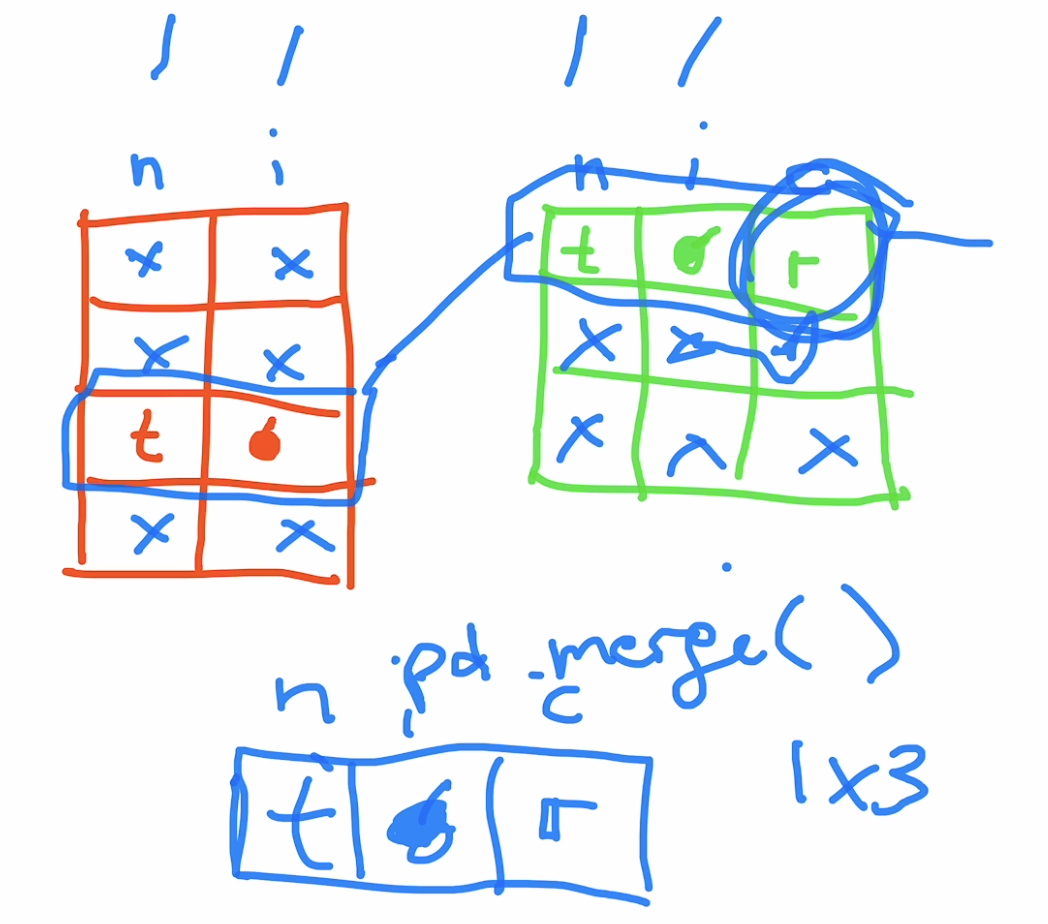

In [27]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

Parameters
----------
left : DataFrame
right : DataFrame or named Series
 

In [28]:
pd.merge(fruits, veggies, how='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     red
3   lemon     🍋     NaN
4  potato     🥔   brown
5  carrot     🥕  orange

In [29]:
pd.concat([fruits, veggies])

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

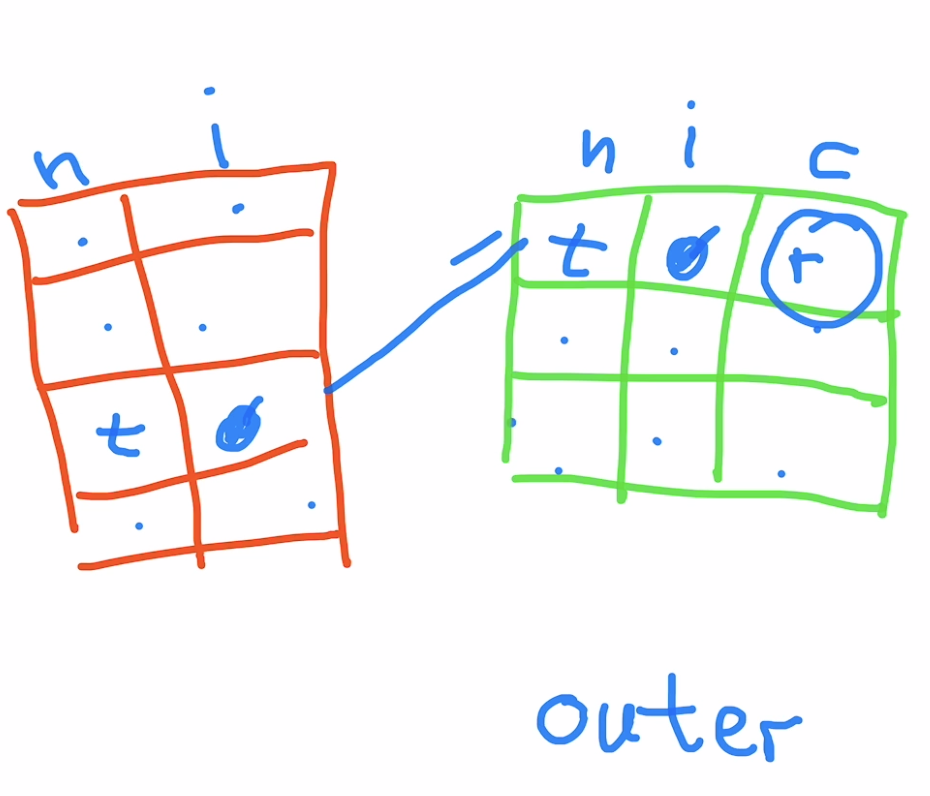

In [30]:
pd.merge(fruits, veggies, how='outer')

name image   color
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     red
3   lemon     🍋     NaN
4  potato     🥔   brown
5  carrot     🥕  orange

</i> Visual representation:
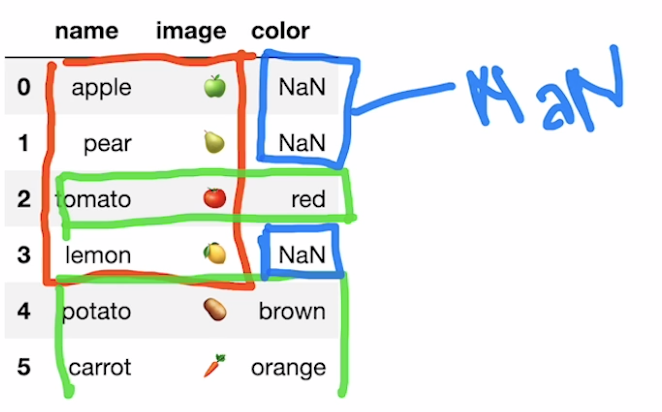

# <b> Understand the Differences Between Left and Right Joins </b>


In [31]:
pd.merge(fruits, veggies, how='left')

name image color
0   apple     🍏   NaN
1    pear     🍐   NaN
2  tomato     🍅   red
3   lemon     🍋   NaN

In [32]:
pd.merge(fruits, veggies, how='right')

name image   color
0  tomato     🍅     red
1  potato     🥔   brown
2  carrot     🥕  orange

In [33]:
fruits['taste'] = ['sweet', 'sweet', 'sour', 'sour']

In [34]:
fruits

name image  taste
0   apple     🍏  sweet
1    pear     🍐  sweet
2  tomato     🍅   sour
3   lemon     🍋   sour

In [35]:
pd.merge(fruits, veggies, how='right')

name image taste   color
0  tomato     🍅  sour     red
1  potato     🥔   NaN   brown
2  carrot     🥕   NaN  orange

# <b>Specify the Join Columns Explicitly</b>

In [36]:
fruits = fruits.drop('taste', axis=1)

In [37]:
fruits

name image
0   apple     🍏
1    pear     🍐
2  tomato     🍅
3   lemon     🍋

In [38]:
pd.merge(fruits, veggies)

name image color
0  tomato     🍅   red

In [39]:
pd.merge(fruits, veggies, on='name')

name image_x color image_y
0  tomato       🍅   red       🍅

In [40]:
pd.merge(fruits, veggies, on='image')

name_x image  name_y color
0  tomato     🍅  tomato   red

In [41]:
pd.merge(fruits, veggies, on=['name', 'image'])

name image color
0  tomato     🍅   red

In [42]:
pd.merge(fruits, veggies, on='color')

KeyError: 'color'

In [ ]:
pd.merge?

# <b>Join DataFrames Using Index Columns

In [ ]:
fruits

In [ ]:
veggies

In [ ]:
pd.merge(fruits, veggies, left_index=True, right_index=True)

In [ ]:
couple_of_fruits = {'name': ['apple', 'pear', 'tomato', 'lemon'],
                    'image': ['🍏', '🍐', '🍅', '🍋'],
                    'amount': [1, 3, 0, 1]}

vegetables = {'name': ['tomato', 'potato', 'carrot'],
              'color':['red', 'brown', 'orange'],
              'image': ['🍅', '🥔', '🥕']}

fruits = pd.DataFrame(couple_of_fruits)
veggies = pd.DataFrame(vegetables)      

In [ ]:
fruits

In [ ]:
veggies

In [ ]:
pd.merge(fruits, veggies, left_on='amount', right_index=True)

# <b>Customize Column Suffixes and Perform a Cross Join</b>

In [ ]:
pd.merge(fruits, veggies, left_on='amount', right_index=True, suffixes=['_f', '_v'])

In [ ]:
pd.merge(fruits, veggies, how='cross')

# <b>Some Pecularities

In [43]:
fruits = pd.concat(
    [fruits, pd.DataFrame([{'name': 'orange', 'image': '🍊', 'amount':10}])],
     ignore_index=True
)

In [44]:
fruits


name image  amount
0   apple     🍏     NaN
1    pear     🍐     NaN
2  tomato     🍅     NaN
3   lemon     🍋     NaN
4  orange     🍊    10.0

In [45]:
veggies

name   color image
0  tomato     red     🍅
1  potato   brown     🥔
2  carrot  orange     🥕

In [46]:
pd.merge(fruits, veggies, left_on='name', right_on='color')

name_x image_x  amount  name_y   color image_y
0  orange       🍊    10.0  carrot  orange       🥕

In [47]:
pd.merge(fruits, veggies, left_on='image', right_on='name')

Empty DataFrame
Columns: [name_x, image_x, amount, name_y, color, image_y]
Index: []

In [48]:
merged = pd.merge(fruits, veggies, how='outer')

In [49]:
merged

name image  amount   color
0   apple     🍏     NaN     NaN
1    pear     🍐     NaN     NaN
2  tomato     🍅     NaN     red
3   lemon     🍋     NaN     NaN
4  orange     🍊    10.0     NaN
5  potato     🥔     NaN   brown
6  carrot     🥕     NaN  orange

In [50]:
merged.dtypes

name       object
image      object
amount    float64
color      object
dtype: object

In [51]:
fruits.dtypes

name       object
image      object
amount    float64
dtype: object

# <b> Conclusion

Mes susipažinome su <b>pd.concat()</b> ir <b>pd.merge()</b> funkcionalimais kuomet palietėme key words kaip <b>axis</b> (0, 1, ‘rows‘, ‘colums‘), <b>join</b> ('inner', 'outer'), <b>how</b> ('outer', 'left', 'right'), <b>suffixes()</b>, <b>left_on</b>, <b>rigth_on</b>, keys (mūsų atveju ‘fruits‘ ar ‘veggies‘) ir pasikartojome funkcijas <i>loc()</i>, <i>iloc()</i> ir <i>drop()</i>!

## <b> Time for exercises

## <b>Back to Slides

# <b>Wide and long data formats

In [52]:
def build_dataframe(periods=100):
    """
    Creates columns with random data.
    """
    import random
    random.seed(10)
    data = {
            'type': random.choices(population=['impressions', 'clicks', 'conversions'], weights=[100, 10, 1], k=periods)
        }
    from datetime import date, timedelta
    from random import choices

    # create some random dates in a test period 
    test_date1, test_date2 = date(2020, 1, 1), date(2020, 2, 1)

    res_dates = [test_date1]

    # loop to get each date till end date
    while test_date1 != test_date2:
        test_date1 += timedelta(days=1)
        res_dates.append(test_date1)

    # random dates
    res = choices(res_dates, k=periods)

    df = pd.DataFrame(data)
    df['date'] = res

    return df


# retrieve the data
long_df = build_dataframe(periods=500)

In [53]:
long_df

type        date
0    impressions  2020-01-03
1    impressions  2020-01-13
2    impressions  2020-01-03
3    impressions  2020-01-01
4    impressions  2020-01-27
..           ...         ...
495  impressions  2020-01-18
496  impressions  2020-01-29
497  impressions  2020-01-16
498  impressions  2020-01-23
499  impressions  2020-01-09

[500 rows x 2 columns]

In [54]:
# Step 1: add a count column to able to summarize when grouping
long_df['count']=1
long_df.tail()

type        date  count
495  impressions  2020-01-18      1
496  impressions  2020-01-29      1
497  impressions  2020-01-16      1
498  impressions  2020-01-23      1
499  impressions  2020-01-09      1

In [55]:
# Step 2: group by date and type and sum
grouped_long_df = long_df.groupby(['date', 'type']).sum().reset_index()
grouped_long_df

date         type  count
0   2020-01-01       clicks      1
1   2020-01-01  impressions     18
2   2020-01-02       clicks      2
3   2020-01-02  impressions     19
4   2020-01-03       clicks      1
5   2020-01-03  conversions      1
6   2020-01-03  impressions     14
7   2020-01-04  impressions      5
8   2020-01-05       clicks      1
9   2020-01-05  impressions      8
10  2020-01-06       clicks      1
11  2020-01-06  conversions      1
12  2020-01-06  impressions     15
13  2020-01-07       clicks      2
14  2020-01-07  impressions      8
15  2020-01-08  conversions      1
16  2020-01-08  impressions     15
17  2020-01-09  impressions     16
18  2020-01-10       clicks      3
19  2020-01-10  impressions     16
20  2020-01-11       clicks      2
21  2020-01-11  impressions     12
22  2020-01-12       clicks      1
23  2020-01-12  impressions     14
24  2020-01-13  impressions     17
25  2020-01-14       clicks      1
26  2020-01-14  impressions     14
27  2020-01-15       clicks      2
28  2020-01-15  impressions      9
29  2020-01-16       clicks      1
30  2020-01-16  impressions     16
31  2020-01-17  impressions     10
32  2020-01-18       clicks      2
33  2020-01-18  impressions     20
34  2020-01-19       clicks      3
35  2020-01-19  conversions      1
36  2020-01-19  impressions     17
37  2020-01-20  impressions     12
38  2020-01-21       clicks      2
39  2020-01-21  impressions     16
40  2020-01-22       clicks      1
41  2020-01-22  conversions      1
42  2020-01-22  impressions     18
43  2020-01-23       clicks      3
44  2020-01-23  impressions     16
45  2020-01-24       clicks      2
46  2020-01-24  impressions     16
47  2020-01-25  impressions     17
48  2020-01-26       clicks      1
49  2020-01-26  impressions     13
50  2020-01-27  conversions      1
51  2020-01-27  impressions     16
52  2020-01-28       clicks      3
53  2020-01-28  impressions     17
54  2020-01-29       clicks      3
55  2020-01-29  impressions     14
56  2020-01-30       clicks      2
57  2020-01-30  impressions     15
58  2020-01-31  impressions      9
59  2020-02-01  impressions     12

<i> <b> columns</b>: Column to use to make new frame’s columns (e.g., ‘type’). </i> <br>
<i> <b>values</b>: Column(s) to use for populating new frame’s values (e.g., ‘count'). </i> <br>
<i> <b>index</b>: Column to use to make new frame’s index (e.g., ‘date’). If None, use the existing index. </i> <br>



In [56]:
# Step 3: build wide format from long format
wide_df = grouped_long_df.pivot(index='date', columns='type', values='count').reset_index()
wide_df.head()

type        date  clicks  conversions  impressions
0     2020-01-01     1.0          NaN         18.0
1     2020-01-02     2.0          NaN         19.0
2     2020-01-03     1.0          1.0         14.0
3     2020-01-04     NaN          NaN          5.0
4     2020-01-05     1.0          NaN          8.0

In [57]:
# Step 4: build long format from wide format
new_long_df =pd.melt(wide_df, id_vars=['date'], var_name='name', value_vars=['impressions', 'clicks', 'conversions'], value_name='count', ignore_index=False)
new_long_df

date         name  count
0   2020-01-01  impressions   18.0
1   2020-01-02  impressions   19.0
2   2020-01-03  impressions   14.0
3   2020-01-04  impressions    5.0
4   2020-01-05  impressions    8.0
..         ...          ...    ...
27  2020-01-28  conversions    NaN
28  2020-01-29  conversions    NaN
29  2020-01-30  conversions    NaN
30  2020-01-31  conversions    NaN
31  2020-02-01  conversions    NaN

[96 rows x 3 columns]

<i>    <b>id_vars</b>: Column(s) to use as identifier variables </i> <br>
<i>    <b>value_vars</b>: Column(s) to unpivot. In our example, it would be the list of year/month columns ('impressions', 'clicks', 'conversions') </i> <br>
<i>    <b>var_name</b>: Name to use for the ‘type’ column </i> <br>
<i>    <b>value_name</b> : Name to use for the ‘count’ column </i> <br>
<i>    <b>ignore_index</b>: If ‘True’, original index is ignored. If ‘False’, the original index is retained </i>

# <b> Multilevel Indexing (Hierarchical Indexing)

In [58]:
# Data
index=[('California', 2000), ('California', 2010),
       ('New York', 2000), ('New York', 2010),
       ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [59]:
# The Bad Way
pop[('California', 2010):('Texas', 2000)]
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [60]:
# The Better Way: Pandas MultiIndex

In [61]:
index = pd.MultiIndex.from_tuples(index)

In [62]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [63]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [64]:
# The unstack() method will quickly convert a multiply
# indexed Series to a conventionally indexed DataFrame:
pop_df = pop.unstack()
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [65]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Some methods of MultiIndex Creation


In [66]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.377029  0.846599
  2  0.685602  0.207390
b 1  0.266224  0.113857
  2  0.600117  0.904628

In [67]:
data = {('California', 2000): 33000000,
        ('California', 2010): 38000000,
        ('Texas', 2000): 20000000,
        ('Texas', 2010): 25000000,
        ('New York', 2000): 18000000,
        ('New York', 2010): 21000000}
population = pd.Series(data)
population

California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
New York    2000    18000000
            2010    21000000
dtype: int64

# MultiIndex level names

In [68]:
population.index.names = ['state', 'year']
population

state       year
California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
New York    2000    18000000
            2010    21000000
dtype: int64

In [69]:
population['California', 2000]

33000000

In [70]:
#Partial indexing is also available
population.sort_index(level=0, inplace=True)
population.loc['California':'New York']

state       year
California  2000    33000000
            2010    38000000
New York    2000    18000000
            2010    21000000
dtype: int64

In [71]:
population.sort_index(level=1, inplace=True)
population['California', :]

year
2000    33000000
2010    38000000
dtype: int64

In [72]:
population[:, 2000]

state
California    33000000
New York      18000000
Texas         20000000
dtype: int64

In [73]:
population[population > 22000000]

state       year
California  2000    33000000
            2010    38000000
Texas       2010    25000000
dtype: int64

In [74]:
population[['California', 'Texas']]

state       year
California  2000    33000000
            2010    38000000
Texas       2000    20000000
            2010    25000000
dtype: int64

# Stacking and unstacking indices

In [75]:
population.unstack(level=0)

state  California  New York     Texas
year                                 
2000     33000000  18000000  20000000
2010     38000000  21000000  25000000

In [76]:
population.unstack(level=1)

year            2000      2010
state                         
California  33000000  38000000
New York    18000000  21000000
Texas       20000000  25000000

In [77]:
population.unstack().stack()

state       year
California  2000    33000000
            2010    38000000
New York    2000    18000000
            2010    21000000
Texas       2000    20000000
            2010    25000000
dtype: int64

More here - https://pandas.pydata.org/docs/user_guide/advanced.html

# <b>Time Series

In [78]:
# Data contains temperature measurements at one hour intervals in Celsius
temp_c = [8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

In [79]:
# df we'll create is going to contain a date time index
df = pd.date_range(start='2022-08-10 00:00:00', periods=24, freq='H')


In [80]:
type(df)

pandas.core.indexes.datetimes.DatetimeIndex

In [81]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=df)

In [82]:
temp

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 01:00:00     7.1
2022-08-10 02:00:00     6.8
2022-08-10 03:00:00     6.4
2022-08-10 04:00:00     6.0
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1
2022-08-10 16:00:00    21.0
2022-08-10 17:00:00    17.9
2022-08-10 18:00:00    15.5
2022-08-10 19:00:00    14.4
2022-08-10 20:00:00    11.9
2022-08-10 21:00:00    11.0
2022-08-10 22:00:00    10.2
2022-08-10 23:00:00     9.1

In [83]:
temp.loc['2022-08-10 05' : '2022-08-10 15']

temp_c
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1

In [84]:
new_df = temp.resample(rule='6h').min()
new_df

temp_c
2022-08-10 00:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 12:00:00    17.9
2022-08-10 18:00:00     9.1

In [85]:
temp.asfreq(freq='4h')

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 04:00:00     6.0
2022-08-10 08:00:00     9.1
2022-08-10 12:00:00    21.2
2022-08-10 16:00:00    21.0
2022-08-10 20:00:00    11.9

In [86]:
temp

temp_c
2022-08-10 00:00:00     8.0
2022-08-10 01:00:00     7.1
2022-08-10 02:00:00     6.8
2022-08-10 03:00:00     6.4
2022-08-10 04:00:00     6.0
2022-08-10 05:00:00     5.4
2022-08-10 06:00:00     4.8
2022-08-10 07:00:00     5.0
2022-08-10 08:00:00     9.1
2022-08-10 09:00:00    12.8
2022-08-10 10:00:00    15.3
2022-08-10 11:00:00    19.1
2022-08-10 12:00:00    21.2
2022-08-10 13:00:00    22.1
2022-08-10 14:00:00    22.4
2022-08-10 15:00:00    23.1
2022-08-10 16:00:00    21.0
2022-08-10 17:00:00    17.9
2022-08-10 18:00:00    15.5
2022-08-10 19:00:00    14.4
2022-08-10 20:00:00    11.9
2022-08-10 21:00:00    11.0
2022-08-10 22:00:00    10.2
2022-08-10 23:00:00     9.1

In [87]:
temp.rolling(window=3).mean()

temp_c
2022-08-10 00:00:00        NaN
2022-08-10 01:00:00        NaN
2022-08-10 02:00:00   7.300000
2022-08-10 03:00:00   6.766667
2022-08-10 04:00:00   6.400000
2022-08-10 05:00:00   5.933333
2022-08-10 06:00:00   5.400000
2022-08-10 07:00:00   5.066667
2022-08-10 08:00:00   6.300000
2022-08-10 09:00:00   8.966667
2022-08-10 10:00:00  12.400000
2022-08-10 11:00:00  15.733333
2022-08-10 12:00:00  18.533333
2022-08-10 13:00:00  20.800000
2022-08-10 14:00:00  21.900000
2022-08-10 15:00:00  22.533333
2022-08-10 16:00:00  22.166667
2022-08-10 17:00:00  20.666667
2022-08-10 18:00:00  18.133333
2022-08-10 19:00:00  15.933333
2022-08-10 20:00:00  13.933333
2022-08-10 21:00:00  12.433333
2022-08-10 22:00:00  11.033333
2022-08-10 23:00:00  10.100000

## <b>Plotting Time Series With pandas DataFrames


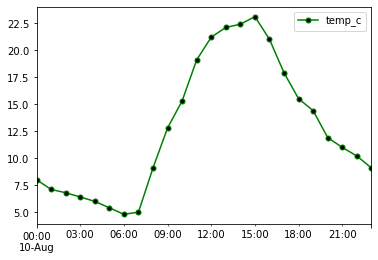

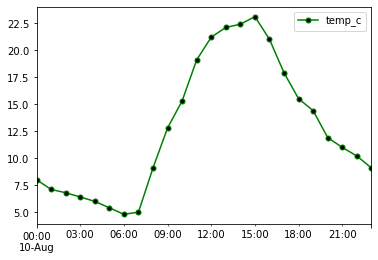

In [88]:
temp.plot(kind='line', color='g', style='.-', mfc='k', ms=10);
temp.plot.line(color='g', style='.-', mfc='k', ms=10).get_figure().savefig('temperatures.png')

# <b> Cleaning Data

## <b> Renaming Headers

In [89]:
olympics = pd.read_csv('Data/olympics.csv')
olympics.head()

0         1     2     3     4      5         6     7     8  \
0                NaN  ? Summer  01 !  02 !  03 !  Total  ? Winter  01 !  02 !   
1  Afghanistan (AFG)        13     0     0     2      2         0     0     0   
2      Algeria (ALG)        12     5     2     8     15         3     0     0   
3    Argentina (ARG)        23    18    24    28     70        18     0     0   
4      Armenia (ARM)         5     1     2     9     12         6     0     0   

      9     10       11    12    13    14              15  
0  03 !  Total  ? Games  01 !  02 !  03 !  Combined total  
1     0      0       13     0     0     2               2  
2     0      0       15     5     2     8              15  
3     0      0       41    18    24    28              70  
4     0      0       11     1     2     9              12

In [90]:
olympics = pd.read_csv('Data/olympics.csv', header=1)
olympics.head()

Unnamed: 0  ? Summer  01 !  02 !  03 !  Total  ? Winter  \
0        Afghanistan (AFG)        13     0     0     2      2         0   
1            Algeria (ALG)        12     5     2     8     15         3   
2          Argentina (ARG)        23    18    24    28     70        18   
3            Armenia (ARM)         5     1     2     9     12         6   
4  Australasia (ANZ) [ANZ]         2     3     4     5     12         0   

   01 !.1  02 !.1  03 !.1  Total.1  ? Games  01 !.2  02 !.2  03 !.2  \
0       0       0       0        0       13       0       0       2   
1       0       0       0        0       15       5       2       8   
2       0       0       0        0       41      18      24      28   
3       0       0       0        0       11       1       2       9   
4       0       0       0        0        2       3       4       5   

   Combined total  
0               2  
1              15  
2              70  
3              12  
4              12

In [91]:
def read():
    return pd.read_csv('Data/olympics.csv', header=1).rename(columns={
        'Unnamed: 0': 'country',
        '? Summer': 'summer_olympics',
        '01 !': 'summer_golds',
        '02 !': 'summer_silvers',
        '03 !': 'summer_bronzes',
        'Total': 'summer_total',
        '? Winter': 'winter_olympics',
        '01 !.1': 'winter_golds',
        '02 !.1': 'winter_silvers',
        '03 !.1': 'winter_bronzes',
        'Total.1': 'winter_total',
        '? Games': 'total_games',
        '01 !.2': 'total_golds',
        '02 !.2': 'total_silvers',
        '03 !.2': 'total_bronzes',
        'Combined total': 'combined_total'
    })

olympics = read()


In [92]:
olympics.head()

country  summer_olympics  summer_golds  summer_silvers  \
0        Afghanistan (AFG)               13             0               0   
1            Algeria (ALG)               12             5               2   
2          Argentina (ARG)               23            18              24   
3            Armenia (ARM)                5             1               2   
4  Australasia (ANZ) [ANZ]                2             3               4   

   summer_bronzes  summer_total  winter_olympics  winter_golds  \
0               2             2                0             0   
1               8            15                3             0   
2              28            70               18             0   
3               9            12                6             0   
4               5            12                0             0   

   winter_silvers  winter_bronzes  winter_total  total_games  total_golds  \
0               0               0             0           13            0   
1               0               0             0           15            5   
2               0               0             0           41           18   
3               0               0             0           11            1   
4               0               0             0            2            3   

   total_silvers  total_bronzes  combined_total  
0              0              2               2  
1              2              8              15  
2             24             28              70  
3              2              9              12  
4              4              5              12

# <b> START OF LECTURE 2 SESSION 2</b>




## <b> Exploring two more datasets to clean

In [96]:
import pandas as pd 
txt = pd.read_csv('Data/university_towns.txt', sep='\t')
txt.head()

Alabama[edit]
0                    Auburn (Auburn University)[1]
1           Florence (University of North Alabama)
2  Jacksonville (Jacksonville State University)[2]
3       Livingston (University of West Alabama)[2]
4         Montevallo (University of Montevallo)[2]

### <b>Processing Data Before Loading a DataFrame

1. Sukuriame list arba dictionary
2. [edit] gali būti naudojami for loop'e
3. Be [edit] mes turime town ir university column'us tai mes galime naudoti šį markerį - [edit] kad sukonstruotume data struktūrą

In [664]:
# Lets set up our boiler plate:
def read():
    pass

towns = read()

In [98]:
def read():
    towns = []
    state = ''
    with open('Data/university_towns.txt') as file:
        for line in file:
            if '[edit]' in line:
                state = line.strip()
            else:
                towns.append([state, line])
    
    
    return pd.DataFrame(towns, columns=['state', 'town'])

towns = read()
towns.to_csv('towns.csv')

In [99]:
towns = pd.read_csv('Data/towns.csv', sep=',')
towns.head()

Unnamed: 0          state  \
0           0  Alabama[edit]   
1           1  Alabama[edit]   
2           2  Alabama[edit]   
3           3  Alabama[edit]   
4           4  Alabama[edit]   

                                                town  
0                    Auburn (Auburn University)[1]\n  
1           Florence (University of North Alabama)\n  
2  Jacksonville (Jacksonville State University)[2]\n  
3       Livingston (University of West Alabama)[2]\n  
4         Montevallo (University of Montevallo)[2]\n

In [100]:
towns.loc[:, 'state']

0        Alabama[edit]
1        Alabama[edit]
2        Alabama[edit]
3        Alabama[edit]
4        Alabama[edit]
            ...       
512    Wisconsin[edit]
513    Wisconsin[edit]
514    Wisconsin[edit]
515    Wisconsin[edit]
516      Wyoming[edit]
Name: state, Length: 517, dtype: object

In [102]:
towns.loc[:, 'state'].str.contains('\[edit\]')

0      True
1      True
2      True
3      True
4      True
       ... 
512    True
513    True
514    True
515    True
516    True
Name: state, Length: 517, dtype: bool

## <b> Cleaning University Towns Data and using .assign()

In [103]:
data = pd.DataFrame({
    'day': [1, 31], 'month': [1, 12], 'year': [2022, 2021]
})

In [104]:
data

day  month  year
0    1      1  2022
1   31     12  2021

In [105]:
data.assign(day=[2, 29])

day  month  year
0    2      1  2022
1   29     12  2021

In [106]:
data.assign(day=lambda df: df.loc[:, 'day'] > 3)

day  month  year
0  False      1  2022
1   True     12  2021

In [108]:
def read():
    return pd.read_csv('towns.csv', index_col=0).assign(
        state=lambda df: df.loc[:, 'state'].str.replace('\[edit\]', ''),
        town=lambda df: df.loc[:, 'town'].str.extract(r'(.+) \(.*'),
    )

towns = read()

In [109]:
towns.head()

state          town
0  Alabama        Auburn
1  Alabama      Florence
2  Alabama  Jacksonville
3  Alabama    Livingston
4  Alabama    Montevallo

In [112]:
books= pd.read_csv('Data/books.csv', sep=',')
books.head()

Identifier             Edition Statement      Place of Publication  \
0         206                           NaN                    London   
1         216                           NaN  London; Virtue & Yorston   
2         218                           NaN                    London   
3         472                           NaN                    London   
4         480  A new edition, revised, etc.                    London   

  Date of Publication              Publisher  \
0         1879 [1878]       S. Tinsley & Co.   
1                1868           Virtue & Co.   
2                1869  Bradbury, Evans & Co.   
3                1851          James Darling   
4                1857   Wertheim & Macintosh   

                                               Title     Author  \
0                  Walter Forbes. [A novel.] By A. A      A. A.   
1  All for Greed. [A novel. The dedication signed...  A., A. A.   
2  Love the Avenger. By the author of “All for Gr...  A., A. A.   
3  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
4  [The World in which I live, and my place in it...  A., E. S.   

                                   Contributors  Corporate Author  \
0                               FORBES, Walter.               NaN   
1  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
2  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
3                   Appleyard, Ernest Silvanus.               NaN   
4                           BROOME, John Henry.               NaN   

   Corporate Contributors Former owner  Engraver Issuance type  \
0                     NaN          NaN       NaN   monographic   
1                     NaN          NaN       NaN   monographic   
2                     NaN          NaN       NaN   monographic   
3                     NaN          NaN       NaN   monographic   
4                     NaN          NaN       NaN   monographic   

                                          Flickr URL  \
0  http://www.flickr.com/photos/britishlibrary/ta...   
1  http://www.flickr.com/photos/britishlibrary/ta...   
2  http://www.flickr.com/photos/britishlibrary/ta...   
3  http://www.flickr.com/photos/britishlibrary/ta...   
4  http://www.flickr.com/photos/britishlibrary/ta...   

                            Shelfmarks  
0    British Library HMNTS 12641.b.30.  
1    British Library HMNTS 12626.cc.2.  
2    British Library HMNTS 12625.dd.1.  
3  British Library HMNTS 10369.bbb.15.  
4     British Library HMNTS 9007.d.28.

In [113]:
def read():
    return (
        pd.read_csv('Data/books.csv')
        .rename(columns=lambda header: header.lower().replace(' ', '_'))
        .rename(columns={'identifier': 'id'})
    )

books = read()

In [115]:
books.head()

id             edition_statement      place_of_publication  \
0  206                           NaN                    London   
1  216                           NaN  London; Virtue & Yorston   
2  218                           NaN                    London   
3  472                           NaN                    London   
4  480  A new edition, revised, etc.                    London   

  date_of_publication              publisher  \
0         1879 [1878]       S. Tinsley & Co.   
1                1868           Virtue & Co.   
2                1869  Bradbury, Evans & Co.   
3                1851          James Darling   
4                1857   Wertheim & Macintosh   

                                               title     author  \
0                  Walter Forbes. [A novel.] By A. A      A. A.   
1  All for Greed. [A novel. The dedication signed...  A., A. A.   
2  Love the Avenger. By the author of “All for Gr...  A., A. A.   
3  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
4  [The World in which I live, and my place in it...  A., E. S.   

                                   contributors  corporate_author  \
0                               FORBES, Walter.               NaN   
1  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
2  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
3                   Appleyard, Ernest Silvanus.               NaN   
4                           BROOME, John Henry.               NaN   

   corporate_contributors former_owner  engraver issuance_type  \
0                     NaN          NaN       NaN   monographic   
1                     NaN          NaN       NaN   monographic   
2                     NaN          NaN       NaN   monographic   
3                     NaN          NaN       NaN   monographic   
4                     NaN          NaN       NaN   monographic   

                                          flickr_url  \
0  http://www.flickr.com/photos/britishlibrary/ta...   
1  http://www.flickr.com/photos/britishlibrary/ta...   
2  http://www.flickr.com/photos/britishlibrary/ta...   
3  http://www.flickr.com/photos/britishlibrary/ta...   
4  http://www.flickr.com/photos/britishlibrary/ta...   

                            shelfmarks  
0    British Library HMNTS 12641.b.30.  
1    British Library HMNTS 12626.cc.2.  
2    British Library HMNTS 12625.dd.1.  
3  British Library HMNTS 10369.bbb.15.  
4     British Library HMNTS 9007.d.28.

## <b>Droping Columns

In [116]:
books.columns

Index(['id', 'edition_statement', 'place_of_publication',
       'date_of_publication', 'publisher', 'title', 'author', 'contributors',
       'corporate_author', 'corporate_contributors', 'former_owner',
       'engraver', 'issuance_type', 'flickr_url', 'shelfmarks'],
      dtype='object')

In [118]:
def read():
    return (
        pd.read_csv('Data/books.csv')
        .rename(columns=lambda header: header.lower().replace(' ', '_'))
        .rename(columns={'identifier': 'id'})
        .drop(
            columns=[
                'edition_statement',
                'contributors',
                'corporate_author', 
                'corporate_contributors',
                'former_owner',
                'engraver', 
                'issuance_type', 
                'shelfmarks',
            ]
        )
    )


books = read()
                
          

In [120]:
books.head()

id      place_of_publication date_of_publication              publisher  \
0  206                    London         1879 [1878]       S. Tinsley & Co.   
1  216  London; Virtue & Yorston                1868           Virtue & Co.   
2  218                    London                1869  Bradbury, Evans & Co.   
3  472                    London                1851          James Darling   
4  480                    London                1857   Wertheim & Macintosh   

                                               title     author  \
0                  Walter Forbes. [A novel.] By A. A      A. A.   
1  All for Greed. [A novel. The dedication signed...  A., A. A.   
2  Love the Avenger. By the author of “All for Gr...  A., A. A.   
3  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
4  [The World in which I live, and my place in it...  A., E. S.   

                                          flickr_url  
0  http://www.flickr.com/photos/britishlibrary/ta...  
1  http://www.flickr.com/photos/britishlibrary/ta...  
2  http://www.flickr.com/photos/britishlibrary/ta...  
3  http://www.flickr.com/photos/britishlibrary/ta...  
4  http://www.flickr.com/photos/britishlibrary/ta...

In [121]:
books.loc[:, 'id'].is_unique

True

In [122]:
def read():
    return (
        pd.read_csv('Data/books.csv')
        .rename(columns=lambda header: header.lower().replace(' ', '_'))
        .rename(columns={'identifier': 'id'})
        .drop(
            columns=[
                'edition_statement',
                'contributors',
                'corporate_author', 
                'corporate_contributors',
                'former_owner',
                'engraver', 
                'issuance_type', 
                'shelfmarks',
            ]
        )
        .set_index('id')
    )


books = read()

In [123]:
books.head()

place_of_publication date_of_publication              publisher  \
id                                                                         
206                    London         1879 [1878]       S. Tinsley & Co.   
216  London; Virtue & Yorston                1868           Virtue & Co.   
218                    London                1869  Bradbury, Evans & Co.   
472                    London                1851          James Darling   
480                    London                1857   Wertheim & Macintosh   

                                                 title     author  \
id                                                                  
206                  Walter Forbes. [A novel.] By A. A      A. A.   
216  All for Greed. [A novel. The dedication signed...  A., A. A.   
218  Love the Avenger. By the author of “All for Gr...  A., A. A.   
472  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
480  [The World in which I live, and my place in it...  A., E. S.   

                                            flickr_url  
id                                                      
206  http://www.flickr.com/photos/britishlibrary/ta...  
216  http://www.flickr.com/photos/britishlibrary/ta...  
218  http://www.flickr.com/photos/britishlibrary/ta...  
472  http://www.flickr.com/photos/britishlibrary/ta...  
480  http://www.flickr.com/photos/britishlibrary/ta...

## Cleaning the Date Column

In [124]:
books.loc[:, 'date_of_publication']

id
206        1879 [1878]
216               1868
218               1869
472               1851
480               1857
              ...     
4158088           1838
4158128       1831, 32
4159563      [1806]-22
4159587           1834
4160339        1834-43
Name: date_of_publication, Length: 8287, dtype: object

In [125]:
books.loc[:, 'date_of_publication'].str.extract(r'(\d{4})').head

<bound method NDFrame.head of             0
id           
206      1879
216      1868
218      1869
472      1851
480      1857
...       ...
4158088  1838
4158128  1831
4159563  1806
4159587  1834
4160339  1834

[8287 rows x 1 columns]>

In [126]:
books.loc[:, 'date_of_publication'].str.extract(r'(\d{4})').isna().sum()

0    183
dtype: int64

In [127]:
books.loc[:, 'date_of_publication'].str.extract(r'(\d{4})').fillna(0).isna().sum()

0    0
dtype: int64

In [128]:
type(books.loc[:, 'date_of_publication'].str.extract(r'(\d{4})').fillna(0))

pandas.core.frame.DataFrame

In [131]:
type(books.loc[:, 'date_of_publication'].str.extract(r'(\d{4})', expand=False).fillna(0))

pandas.core.series.Series

In [135]:
pd.to_numeric(
    books.loc[:, 'date_of_publication']
    .str.extract(r'(\d{4})', expand=False)
    .fillna(0),
    downcast='unsigned',
).head()

id
206    1879
216    1868
218    1869
472    1851
480    1857
Name: date_of_publication, dtype: uint16

In [666]:
def clean_date_of_publication(books):
    return pd.to_numeric(
        books.loc[:, "date_of_publication"]
        .str.extract(r"(\d{4})", expand=False)
        .fillna(0),
        downcast="unsigned",
    )

In [136]:
def clean_date_of_publication(books):
    return pd.to_numeric(
    books.loc[:, 'date_of_publication']
    .str.extract(r'(\d{4})', expand=False)
    .fillna(0),
    downcast='unsigned',
)

In [139]:
def read():
    return (
        pd.read_csv('Data/books.csv')
        .rename(columns=lambda header: header.lower().replace(' ', '_'))
        .rename(columns={'identifier': 'id'})
        .drop(
            columns=[
                'edition_statement',
                'contributors',
                'corporate_author', 
                'corporate_contributors',
                'former_owner',
                'engraver', 
                'issuance_type', 
                'shelfmarks',
            ]
        )
        .set_index('id')
        .assign(date_of_publication=clean_date_of_publication)
    )


books = read()
books

place_of_publication  date_of_publication  \
id                                                       
206                        London                 1879   
216      London; Virtue & Yorston                 1868   
218                        London                 1869   
472                        London                 1851   
480                        London                 1857   
...                           ...                  ...   
4158088                    London                 1838   
4158128                     Derby                 1831   
4159563                    London                 1806   
4159587       Newcastle upon Tyne                 1834   
4160339                    London                 1834   

                       publisher  \
id                                 
206             S. Tinsley & Co.   
216                 Virtue & Co.   
218        Bradbury, Evans & Co.   
472                James Darling   
480         Wertheim & Macintosh   
...                          ...   
4158088                      NaN   
4158128          M. Mozley & Son   
4159563  T. Cadell and W. Davies   
4159587         Mackenzie & Dent   
4160339                      NaN   

                                                     title  \
id                                                           
206                      Walter Forbes. [A novel.] By A. A   
216      All for Greed. [A novel. The dedication signed...   
218      Love the Avenger. By the author of “All for Gr...   
472      Welsh Sketches, chiefly ecclesiastical, to the...   
480      [The World in which I live, and my place in it...   
...                                                    ...   
4158088  The Parochial History of Cornwall, founded on,...   
4158128  The History and Gazetteer of the County of Der...   
4159563  Magna Britannia; being a concise topographical...   
4159587  An historical, topographical and descriptive v...   
4160339  Collectanea Topographica et Genealogica. [Firs...   

                                                    author  \
id                                                           
206                                                  A. A.   
216                                              A., A. A.   
218                                              A., A. A.   
472                                              A., E. S.   
480                                              A., E. S.   
...                                                    ...   
4158088                 GIDDY, afterwards GILBERT, Davies.   
4158128                         GLOVER, Stephen - of Derby   
4159563  LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...   
4159587                              Mackenzie, E. (Eneas)   
4160339                                                NaN   

                                                flickr_url  
id                                                          
206      http://www.flickr.com/photos/britishlibrary/ta...  
216      http://www.flickr.com/photos/britishlibrary/ta...  
218      http://www.flickr.com/photos/britishlibrary/ta...  
472      http://www.flickr.com/photos/britishlibrary/ta...  
480      http://www.flickr.com/photos/britishlibrary/ta...  
...                                                    ...  
4158088  http://www.flickr.com/photos/britishlibrary/ta...  
4158128  http://www.flickr.com/photos/britishlibrary/ta...  
4159563  http://www.flickr.com/photos/britishlibrary/ta...  
4159587  http://www.flickr.com/photos/britishlibrary/ta...  
4160339  http://www.flickr.com/photos/britishlibrary/ta...  

[8287 rows x 6 columns]

## <b> Cleaning Text Based on Rules

In [141]:
books.loc[:, 'place_of_publication']

id
206                          London
216        London; Virtue & Yorston
218                          London
472                          London
480                          London
                     ...           
4158088                      London
4158128                       Derby
4159563                      London
4159587         Newcastle upon Tyne
4160339                      London
Name: place_of_publication, Length: 8287, dtype: object

In [146]:
books.loc[:, 'place_of_publication'].str.contains('-').head()

id
206    False
216    False
218    False
472    False
480    False
Name: place_of_publication, dtype: bool

In [147]:
books.loc[books.loc[:, 'place_of_publication'].str.contains('-'), 'place_of_publication'].head()

id
3017             Puerto-Rico
69359               New-York
182518    Barton-upon-Humber
194380          Saint-Dizier
194809              New-York
Name: place_of_publication, dtype: object

In [152]:
# books.loc[books.loc[:, 'place_of_publication'].str.contains(';'), 'place_of_publication'].head()
books.loc[books.loc[:, 'place_of_publication'].str.contains('\]'), 'place_of_publication'].head()

id
874                                 London]
11852    pp. 40. W. Cann: Plymouth, [1876?]
30269                            Allahabad]
49724                    Cambridge, [Mass.]
74744                            Edinburgh]
Name: place_of_publication, dtype: object

In [155]:
def clean_place_of_publication(books):
    return (
        books.loc[:, 'place_of_publication']
        .str.replace(r'.*London.*', 'London', regex=True)
        .str.replace(r'.*Oxford.*', 'Oxford', regex=True)
        .str.replace(r'.*Plymouth.*', 'Plymouth', regex=True)
        .str.replace(r'-', ' ', regex=True)
    )


books = read()
books.tail()

place_of_publication  date_of_publication                publisher  \
id                                                                           
4158088               London                 1838                      NaN   
4158128                Derby                 1831          M. Mozley & Son   
4159563               London                 1806  T. Cadell and W. Davies   
4159587  Newcastle upon Tyne                 1834         Mackenzie & Dent   
4160339               London                 1834                      NaN   

                                                     title  \
id                                                           
4158088  The Parochial History of Cornwall, founded on,...   
4158128  The History and Gazetteer of the County of Der...   
4159563  Magna Britannia; being a concise topographical...   
4159587  An historical, topographical and descriptive v...   
4160339  Collectanea Topographica et Genealogica. [Firs...   

                                                    author  \
id                                                           
4158088                 GIDDY, afterwards GILBERT, Davies.   
4158128                         GLOVER, Stephen - of Derby   
4159563  LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...   
4159587                              Mackenzie, E. (Eneas)   
4160339                                                NaN   

                                                flickr_url  
id                                                          
4158088  http://www.flickr.com/photos/britishlibrary/ta...  
4158128  http://www.flickr.com/photos/britishlibrary/ta...  
4159563  http://www.flickr.com/photos/britishlibrary/ta...  
4159587  http://www.flickr.com/photos/britishlibrary/ta...  
4160339  http://www.flickr.com/photos/britishlibrary/ta...

In [156]:
def read():
    return (
        pd.read_csv('Data/books.csv')
        .rename(columns=lambda header: header.lower().replace(' ', '_'))
        .rename(columns={'identifier': 'id'})
        .drop(
            columns=[
                'edition_statement',
                'contributors',
                'corporate_author', 
                'corporate_contributors',
                'former_owner',
                'engraver', 
                'issuance_type', 
                'shelfmarks',
            ]
        )
        .set_index('id')
        .assign(date_of_publication=clean_date_of_publication,
                place_of_publication=clean_place_of_publication,
               )
    )

books = read()
books.head()

place_of_publication  date_of_publication              publisher  \
id                                                                     
206               London                 1879       S. Tinsley & Co.   
216               London                 1868           Virtue & Co.   
218               London                 1869  Bradbury, Evans & Co.   
472               London                 1851          James Darling   
480               London                 1857   Wertheim & Macintosh   

                                                 title     author  \
id                                                                  
206                  Walter Forbes. [A novel.] By A. A      A. A.   
216  All for Greed. [A novel. The dedication signed...  A., A. A.   
218  Love the Avenger. By the author of “All for Gr...  A., A. A.   
472  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
480  [The World in which I live, and my place in it...  A., E. S.   

                                            flickr_url  
id                                                      
206  http://www.flickr.com/photos/britishlibrary/ta...  
216  http://www.flickr.com/photos/britishlibrary/ta...  
218  http://www.flickr.com/photos/britishlibrary/ta...  
472  http://www.flickr.com/photos/britishlibrary/ta...  
480  http://www.flickr.com/photos/britishlibrary/ta...

# <b> Conclusion

- Atskyrėme skirtumus tarp wide ir long duomenų formatų (long -> wide -> pivot(), wide -> long -> melt()). Taip pat aptarėme su tuo susietus key words.
- Tada kalbėjome apie multi lygio indeksavimą ir išmokome unstack() ir stack() funkcijų panaudojimus.
- Vėliau žiūrėjome į Time Series pagrindus kai palietėme keletą key words kaip period, freq ir funckijas resample(), asfreq() ar rolling().
- Galiausiai pažiūrėjome kaip valyti duomenis kuomet rašėme Python‘o funkcijas valymui ir naudojome Regex‘ą.


## <b> Time for exercises

# <b> Pandas Correlation Calculation

In [157]:
values = {'Name': ['Ann', 'Rob', 'Tom', 'Ivy'],
          'Years of Experience': [30, 21, 19, 10],
          'Anual Salary': [120000, 105000, 90000, 82000]}
df = pd.DataFrame.from_dict(values)
df

Name  Years of Experience  Anual Salary
0  Ann                   30        120000
1  Rob                   21        105000
2  Tom                   19         90000
3  Ivy                   10         82000

## <b>Different correlations:
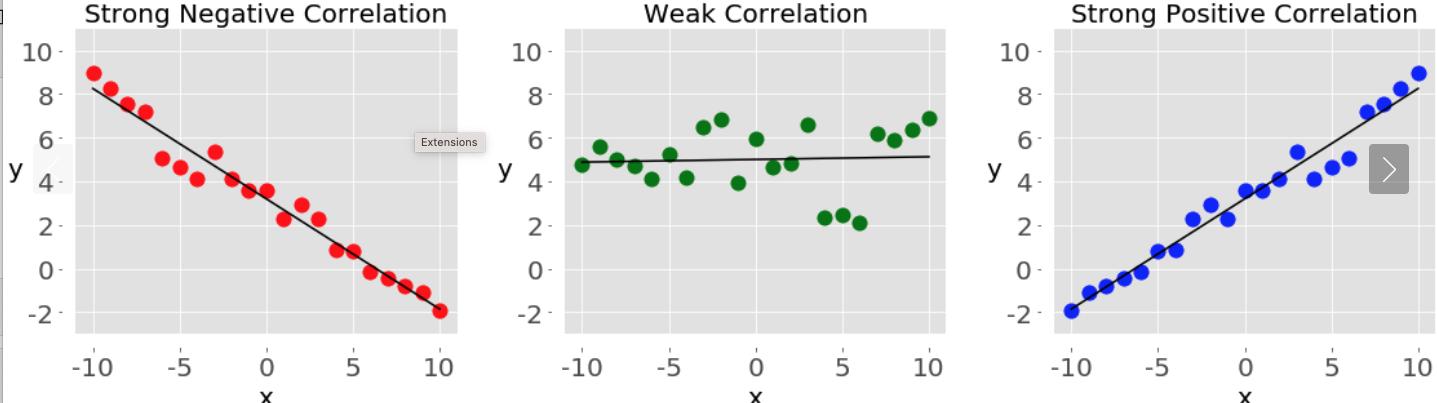

<b>Neigiama koreliacija</b> (<i>raudoni taškai</i>): diagramoje kairėje y reikšmės linkusios mažėti, kai x reikšmės didėja. Tai stipri neigiama koreliacija. <br>
<b>Silpna koreliacija</b> (<i>žalieji taškai</i>): grafike viduryje nėra akivaizdžių tendencijų. Tai silpna koreliacija. <br>
<b>Teigiama koreliacija</b> (<i>mėlyni taškai</i>): diagramoje dešinėje y reikšmės linkusios didėti, kai didėja x reikšmės. Tai stipri teigiama koreliacija.

## <b> Teigiama koreliacija tarp patirties ir algos</b>
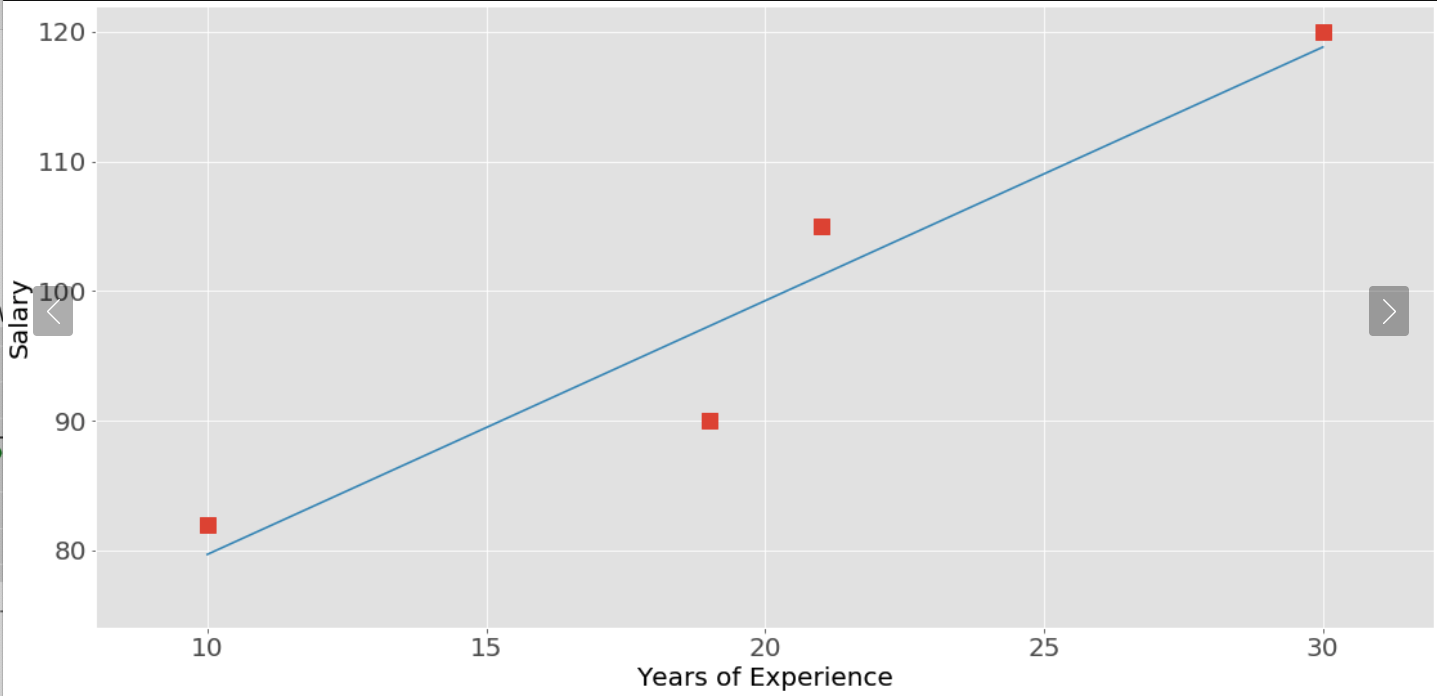

Daugiau info apie statistiką naudojant Python galite pasiskaityti - https://realpython.com/python-statistics/

Yra skirtingų tipų koreliacijos: <b>Pearson'o</b> koreliacija (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) matuoja tiesinę koreliaciją, o <b>Spearman</b> (https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) ir <b>Kendall</b> (https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) lygina duomenis pagal rank'us.

In [158]:
x = pd.Series(range(10, 20))
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [159]:
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [160]:
x.corr(y)

0.7586402890911867

In [161]:
x.corr(y, method='spearman')

0.9757575757575757

In [162]:
x.corr(y, method='kendall')

0.911111111111111

## <b> Linear Correlation

Important facts about <b>Pearson</b> correlation coefficient: </br>
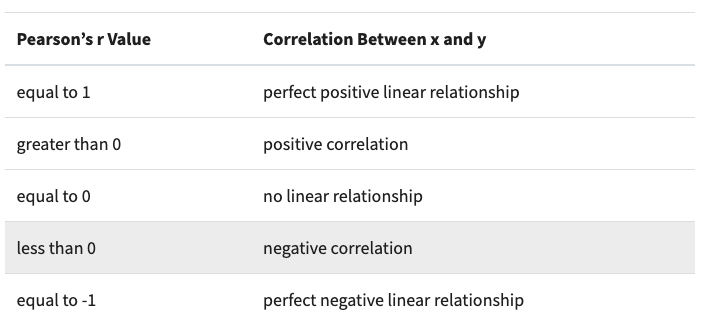

## <B> Pandas Implementation

In [163]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xy

x-values  y-values
0        10         2
1        11         1
2        12         4
3        13         5
4        14         8
5        15        12
6        16        18
7        17        25
8        18        96
9        19        48

In [164]:
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
z

0     5
1     3
2     2
3     1
4     0
5    -2
6    -8
7   -11
8   -15
9   -16
dtype: int64

In [165]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})
xyz


x-values  y-values  z-values
0        10         2         5
1        11         1         3
2        12         4         2
3        13         5         1
4        14         8         0
5        15        12        -2
6        16        18        -8
7        17        25       -11
8        18        96       -15
9        19        48       -16

In [166]:
x.corr(y)

0.7586402890911867

In [168]:
u, u_with_nan = pd.Series([1, 2, 3]), pd.Series([1, 2, np.nan, 3])
v, w = pd.Series([1, 4, 8]), pd.Series([1, 4, 154, 8])

In [171]:
u.corr(v)
u_with_nan.corr(w)

0.9966158955401239

In [172]:
corr_matrix = xy.corr()
corr_matrix

x-values  y-values
x-values   1.00000   0.75864
y-values   0.75864   1.00000

In [175]:
corr_matrix.at['x-values', 'y-values']
corr_matrix.iat[0, 1]

0.7586402890911869

In [176]:
xyz.corr()

x-values  y-values  z-values
x-values  1.000000  0.758640 -0.968072
y-values  0.758640  1.000000 -0.834079
z-values -0.968072 -0.834079  1.000000

In [177]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

## <b>Rank Correlation - Pandas Implementation

In [179]:
x.corr(y, method='spearman')
xy.corr(method='spearman')

x-values  y-values
x-values  1.000000  0.975758
y-values  0.975758  1.000000

In [181]:
xyz.corr(method='spearman')
xy.corrwith(z, method='spearman')

x-values   -1.000000
y-values   -0.975758
dtype: float64

In [183]:
x.corr(y, method='kendall')
xy.corr(method='kendall')

x-values  y-values
x-values  1.000000  0.911111
y-values  0.911111  1.000000

In [185]:
xyz.corr(method='kendall')
xy.corrwith(z, method='kendall')

x-values   -1.000000
y-values   -0.911111
dtype: float64

## <b> Visualization of Correlation

Duomenų vizualizacija yra gana svarbus aspektas statistikoje ir duomenų moksle, kas gali padėti geriau suprasti duomenis ir ryšius tarp kintamųjų ar savybių.

In [187]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [189]:
corr_matrix =  np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

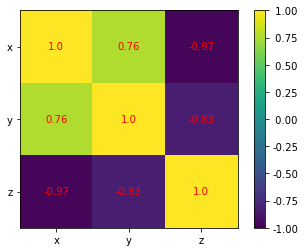

In [192]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center', color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

# <b> Conclusion

Sužinojote, kad koreliacijos koeficientai yra statistika, matuojantys ryšį tarp kintamųjų arba duomenų rinkinių savybių, kurie yra labai svarbūs duomenų moksle (data science) ir mašininiame mokymęsi (machine learning).

# END OF LECTURE 2 SESSION 2